# Problem Statement
The goal of this project is to analyze bank statements and gain insights into customer transactions. Key objectives include identifying spending patterns, categorizing transactions, and creating a summary dashboard.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

 Loading the Dataset

In [3]:
# Load Dataset
df = pd.read_csv("bankstatements.csv")

# Display first few rows
print("Dataset Preview:")
display(df.head())

# Check dataset info
df.info()
print(df.describe())

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

Dataset Preview:


,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,NaN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,NaN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     370 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB
              amount        balance         Day       Month         Year  \
count     509.000000     509.000000  509.000000  509.000000   509.000000   
mean     8736.453006  115873.671493   13.569745    6.163065  2022.489194   
std     27181.105774  136850.421744    9.168241    3.282459     0.500375   
min         1.000000       0.130000    1.000000    1.000000  2022.000000

Missing Values:
date         0
DrCr         0
amount       0
balance      0
mode         0
name       139
Day          0
Month        0
Year         0
Tday         0
dtype: int64
Number of duplicate rows: 1


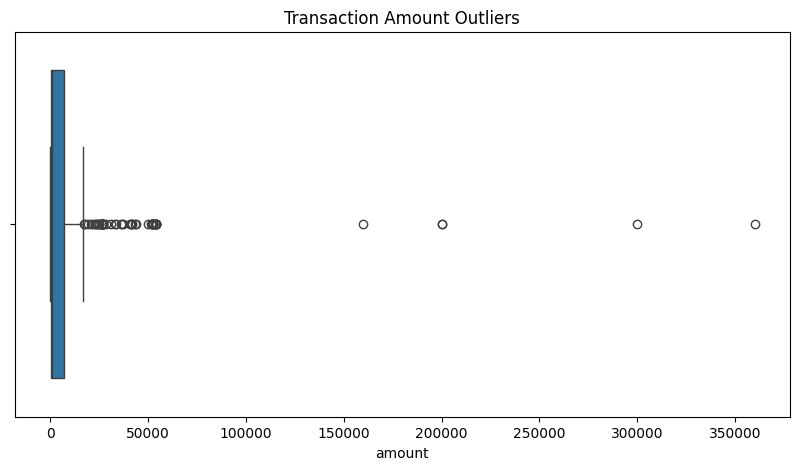

In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

# Identify outliers using box plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['amount'])
plt.title("Transaction Amount Outliers")
plt.show()

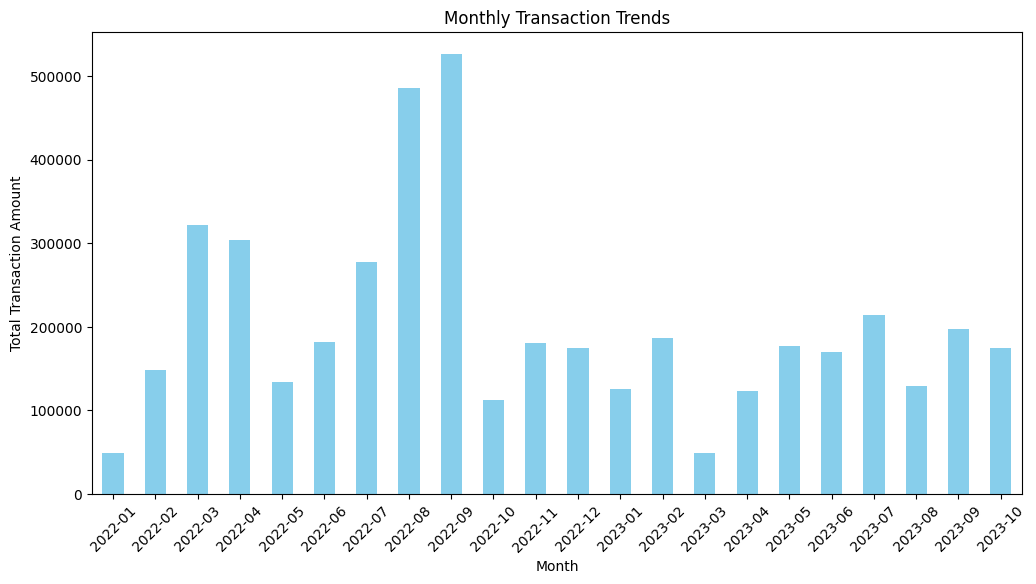

In [5]:
# Transaction pattern analysis
# Monthly transaction trends
df['Month'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby('Month')['amount'].sum()

plt.figure(figsize=(12,6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()

In [24]:

# Identifying recurring transactions
recurring_transactions = df.groupby(['DrCr', 'name'])['amount'].mean()
print("Recurring Transactions:")
print(recurring_transactions)


Recurring Transactions:
DrCr  name     
Cr    1MGHEALT       169.960000
      ABUTALAH     31176.930526
      ADINATHM         7.090000
      AGRAWALB      2400.000000
      AMAZONPAY    41699.000000
                       ...     
Db    STATEBAN     13200.000000
      SUNILKA       5288.888889
      SUNILSHA       225.000000
      UTTAMRAJ       236.000000
      VINAYAKV      3020.000000
Name: amount, Length: 105, dtype: float64


In [6]:
# Financial Health Assessment
income = df[df['amount'] > 0]['amount'].sum()
expenses = df[df['amount'] < 0]['amount'].sum()
savings = income + expenses
savings_rate = savings / income

print(f"Total Income: ${income:.2f}")
print(f"Total Expenses: ${expenses:.2f}")
print(f"Savings: ${savings:.2f}")
print(f"Savings Rate: {savings_rate:.2%}")

Total Income: $4441854.58
Total Expenses: $0.00
Savings: $4441854.58
Savings Rate: 100.00%


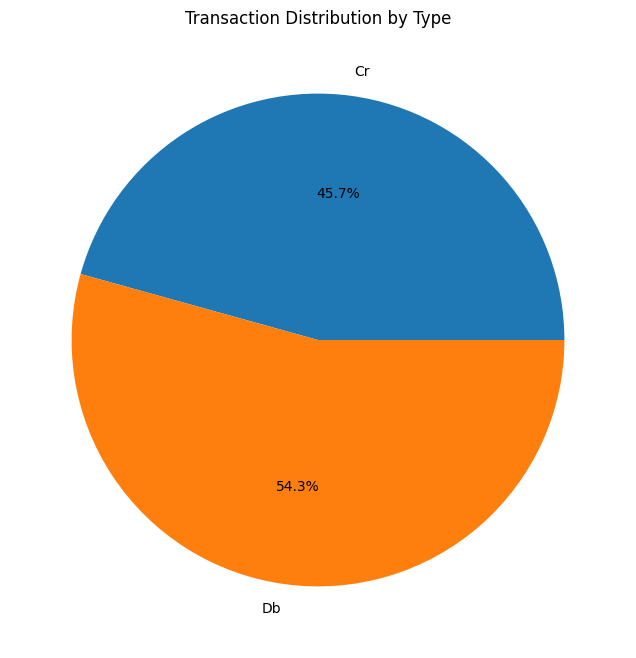

In [26]:
# Data Visualization
plt.figure(figsize=(8,8))
df.groupby('DrCr')['amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Transaction Distribution by Type")
plt.ylabel("")
plt.show()

In [ ]:
# Save the cleaned dataset
# df.to_csv("cleaned_bankstatements.csv", index=False)



Analysis complete. Report and visuals generated.


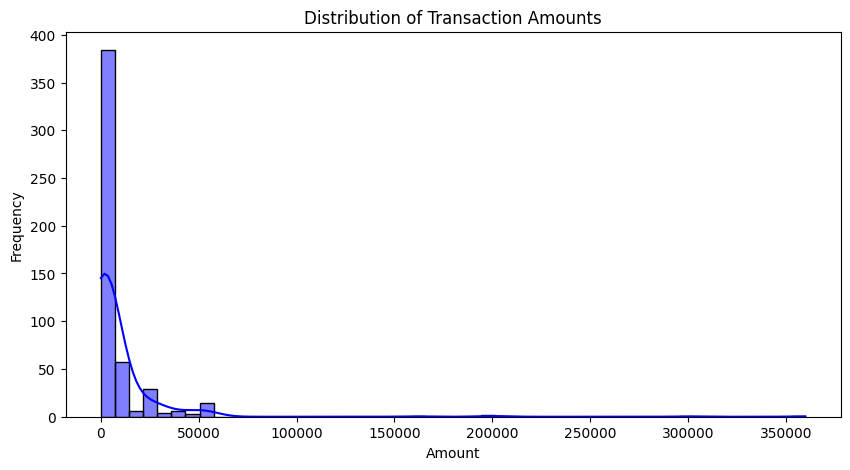

In [7]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

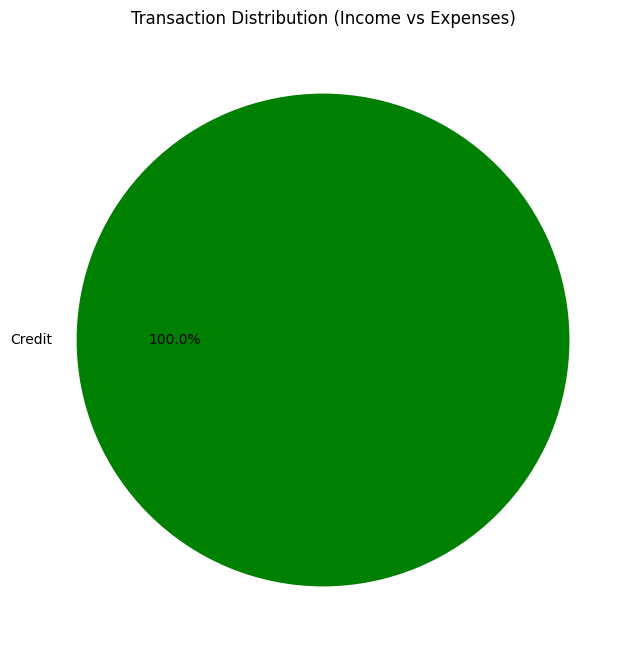

In [31]:
# Categorizing transactions as income and expenses
df['Transaction_Type'] = np.where(df['amount'] > 0, 'Credit', 'Debit')

# Pie chart for transaction distribution
plt.figure(figsize=(8, 8))
df.groupby('Transaction_Type')['amount'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Transaction Distribution (Income vs Expenses)")
plt.ylabel("")
plt.show()


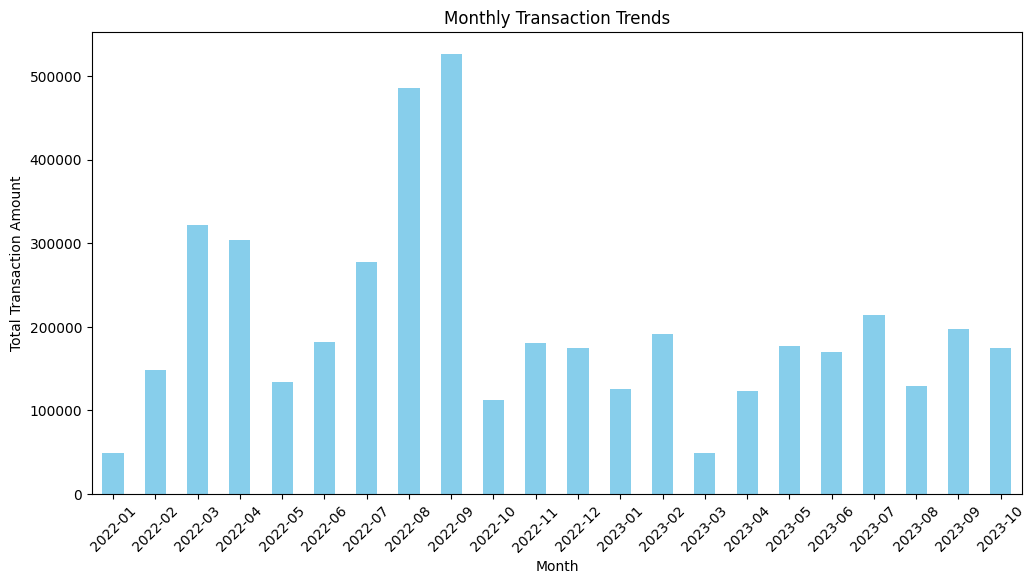


Total Income: $4446854.58
Total Expenses: $0.00
Savings: $4446854.58
Savings Rate: 100.00%

Exploratory Data Analysis Complete! 🚀


In [4]:


# Create new columns for better analysis
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day_of_Week'] = df['date'].dt.day_name()





# Monthly transaction trends
df['Month_Year'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby('Month_Year')['amount'].sum()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()





# Financial Health Assessment
total_income = df[df['amount'] > 0]['amount'].sum()
total_expenses = df[df['amount'] < 0]['amount'].sum()
savings = total_income + total_expenses  # Expenses are negative, so addition results in correct savings
savings_rate = (savings / total_income) * 100 if total_income != 0 else 0

print(f"\nTotal Income: ${total_income:.2f}")
print(f"Total Expenses: ${total_expenses:.2f}")
print(f"Savings: ${savings:.2f}")
print(f"Savings Rate: {savings_rate:.2f}%")

# Save the cleaned dataset
df.to_csv("cleaned_bankstatements.csv", index=False)

print("\nExploratory Data Analysis Complete! 🚀")


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("bankstatements.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract time-based features
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Week'] = df['date'].dt.isocalendar().week
df['Day'] = df['date'].dt.day
df['Day_of_Week'] = df['date'].dt.day_name()

# Categorize transactions as Income (Credit) or Expense (Debit)
df['Transaction_Type'] = np.where(df['DrCr'] == 'Cr', 'Income', 'Expense')


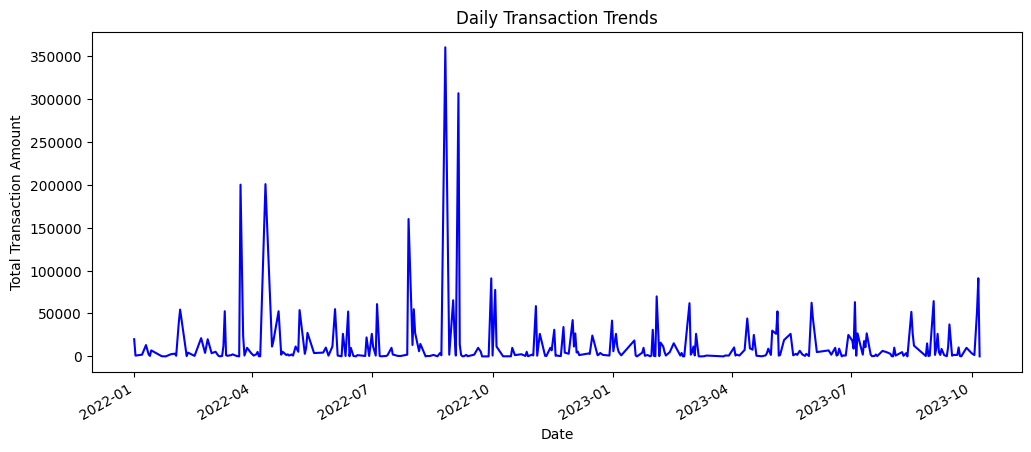

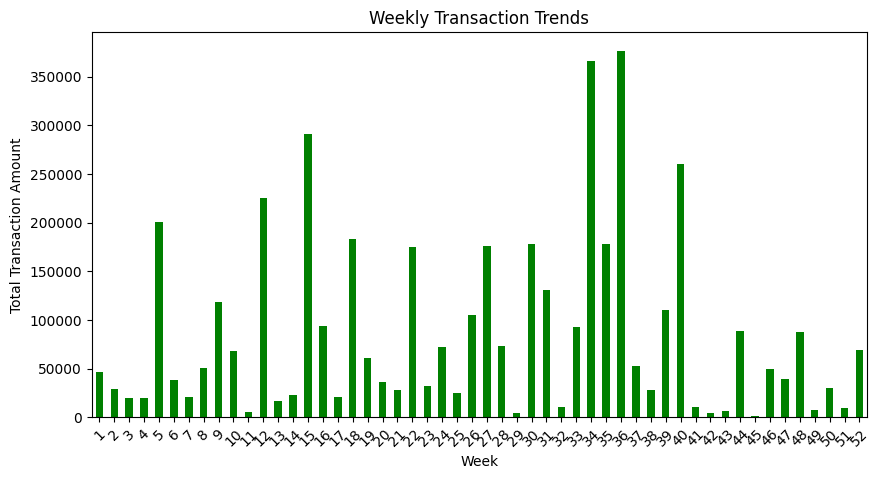

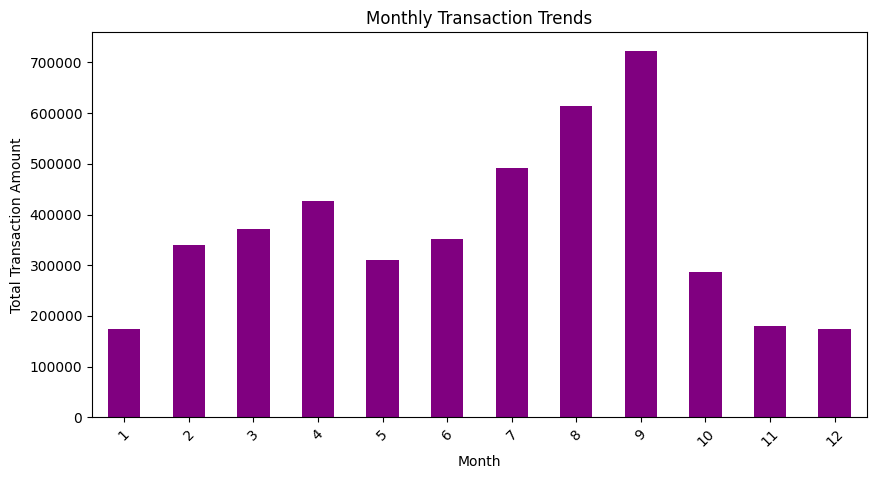

In [ ]:
# Daily Transaction Trends
plt.figure(figsize=(12, 5))
df.groupby('date')['amount'].sum().plot(kind='line', color='blue')
plt.title("Daily Transaction Trends")
plt.xlabel("Date")
plt.ylabel("Total Transaction Amount")
plt.show()



# Monthly Transaction Trends
plt.figure(figsize=(10, 5))
df.groupby('Month')['amount'].sum().plot(kind='bar', color='purple')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()


In [6]:
# Weekly Transaction Trends
plt.figure(figsize=(10, 5))
df.groupby('Week')['amount'].sum().plot(kind='bar', color='green')
plt.title("Weekly Transaction Trends")
plt.xlabel("Week")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()

KeyError: 'Week'

<Figure size 1000x500 with 0 Axes>

In [15]:
# Group transactions by 'name' and check for recurring payments
recurring_transactions = df.groupby(['name', 'Transaction_Type'])['amount'].agg(['count', 'mean', 'sum'])
recurring_transactions = recurring_transactions.sort_values(by='count', ascending=False)

print("\nRecurring Transactions:")
print(recurring_transactions.head(10))  # Display top 10 recurring transactions



Recurring Transactions:
                            count          mean       sum
name      Transaction_Type                               
ABUTALAH  Expense              79   3013.405063  238059.0
PHONEPE   Expense              34    399.882353   13596.0
NAFEESAB  Income               27   8787.185185  237254.0
SANGALLI  Expense              19   2910.578947   55301.0
HDFCBANK  Expense              18  25310.277778  455585.0
FLIPKART  Expense              16    445.750000    7132.0
AYUBRAJE  Expense              13    811.153846   10545.0
BUDESAHEB Expense              11   3834.545455   42180.0
DADAKHALA Expense              10  10772.200000  107722.0
ASHOKHUC  Expense              10    389.700000    3897.0


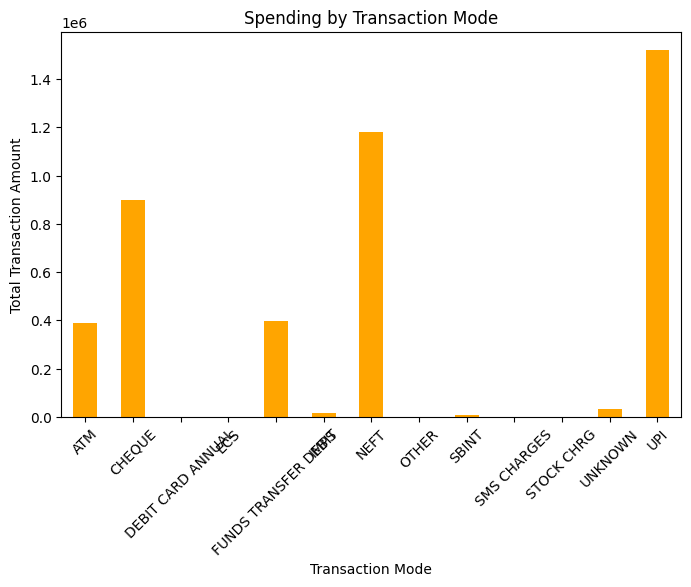

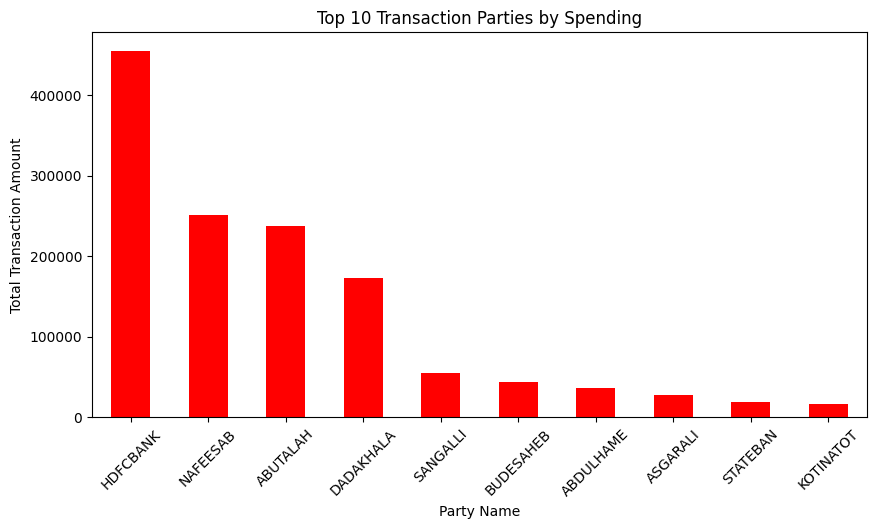

In [16]:
# Transaction Analysis by Mode (ATM, UPI, etc.)
plt.figure(figsize=(8, 5))
df.groupby('mode')['amount'].sum().plot(kind='bar', color='orange')
plt.title("Spending by Transaction Mode")
plt.xlabel("Transaction Mode")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()

# Top Spending by Parties Involved
plt.figure(figsize=(10, 5))
df.groupby('name')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.title("Top 10 Transaction Parties by Spending")
plt.xlabel("Party Name")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()
